# DFN - Detect Fake News

## Projet IA portant sur la détection de fake news

## 0. Librairies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, classification_report
import pickle as pkl #file to save and load a model.

## 1. Import des datasets

*Datasets provenant de Kaggle*

### 1.1. Import du dataset contant les good news

In [2]:
ds_true = pd.read_csv('datasets/true.csv')
ds_true

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


### 1.2. Import du dataset contenant les fake news

In [3]:
ds_fake = pd.read_csv('datasets/fake.csv')
ds_fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


### 1.3. Import du dataset *fake_and_real_news.csv*

In [4]:
ds_fake_real = pd.read_csv('datasets/fake_and_real_news.csv')
ds_fake_real

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real
...,...,...
9895,Wikileaks Admits To Screwing Up IMMENSELY Wit...,Fake
9896,Trump consults Republican senators on Fed chie...,Real
9897,Trump lawyers say judge lacks jurisdiction for...,Real
9898,WATCH: Right-Wing Pastor Falsely Credits Trum...,Fake


### 1.4. Ajout de la colonne "Label" nous permettant de classifier les good et fake news

*On ajoute la colonne "Label" dans nos dataset **fake.csv** et **true.csv**. 0 pour "Fake news" et 1 pour "Good news"*

In [5]:
ds_true['Label'] = True
ds_fake['Label'] = False

In [6]:
ds_true.head()

,title,text,subject,date,Label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True


In [7]:
ds_fake.head()

,title,text,subject,date,Label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",False
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",False
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",False
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",False
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",False


### 1.5. On transforme notre dataset *fake_and_real_news.csv*

*On veut convertir en nombre notre colonne **label**. 0 pour Fake et 1 pour Real.*

In [8]:
ds_fake_real['label'] = ds_fake_real['label'].replace({"Fake": False, 'Real': True})
ds_fake_real

C:\Users\hugof\AppData\Local\Temp\ipykernel_28848\2660363864.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ds_fake_real['label'] = ds_fake_real['label'].replace({"Fake": False, 'Real': True})


,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,False
1,U.S. conservative leader optimistic of common ...,True
2,"Trump proposes U.S. tax overhaul, stirs concer...",True
3,Court Forces Ohio To Allow Millions Of Illega...,False
4,Democrats say Trump agrees to work on immigrat...,True
...,...,...
9895,Wikileaks Admits To Screwing Up IMMENSELY Wit...,False
9896,Trump consults Republican senators on Fed chie...,True
9897,Trump lawyers say judge lacks jurisdiction for...,True
9898,WATCH: Right-Wing Pastor Falsely Credits Trum...,False


### 1.6. Concaténation des datasets *fake.csv*, *true.csv* et *fake_and_real_news.csv*

**On modifie les noms des colonnes de notre dataset *fake_and_real_news.csv* pour une meilleure concaténation**

In [9]:
ds_fake_real.rename(columns={"Text": "text", "label": "Label"}, inplace=True)

**Et c'est partie pour la concaténation**

In [10]:
df = pd.concat([
    ds_true[['text', 'Label']],
    ds_fake[['text', 'Label']],
    ds_fake_real[['text', 'Label']]
], ignore_index=True)

## 2. Analyse rapide du dataset

### 2.1. On affiche 10 lignes aléatoires

In [11]:
df.sample(10)

,text,Label
21910,Donald Trump has an endless history of racism ...,False
50131,Highlights: The Trump presidency on April 13 a...,True
30178,"If you listen to Republicans, the Affordable C...",False
32280,Just two months shy of the one-year anniversar...,False
33704,Google Maps was alerted to a mysterious chan...,False
21972,Donald Trump held a bizarre press conference T...,False
27864,North Carolina Republicans should have listene...,False
21098,UNITED NATIONS (Reuters) - The United Nations ...,True
32358,"Dr. Abdul El-Sayed, a liberal Democrat would l...",False
44482,21st Century Wire says Now we can see part of...,False


### 2.2. On affiche les informations du dataset

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54798 entries, 0 to 54797
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    54798 non-null  object
 1   Label   54798 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 481.8+ KB


### 2.3. On affiche une description brève du dataset

In [13]:
df.describe(include='all')

,text,Label
count,54798,54798
unique,48511,2
top,,False
freq,627,28481


### 2.4. On affiche les nombres de lignes et colonnes de notre dataset

In [14]:
print(f"On a {df.shape[0]} lignes et {df.shape[1]} colonnes dans notre dataset.")

On a 54798 lignes et 2 colonnes dans notre dataset.


### 2.5. Analyse des quelques textes

In [15]:
print(f"Text: {df.text[5000]}\nisGoodNews: {df.Label[5000]}")

Text: WASHINGTON (Reuters) - Republican U.S. Representative Todd Rokita keeps a clock hanging on the wall of his Capitol Hill office that tracks the U.S. government’s rising debt in real time and reminds him of his top priority: reining in federal spending. “I was sent here on a fiscal note,” said the Indiana lawmaker and vice chairman of the House of Representatives Budget Committee, who rode a Republican wave during his first election to Congress in 2010. When President Donald Trump unveils his budget for the 2018 fiscal year on Thursday, Rokita will be among many conservative Republicans cheering proposed cuts to domestic programs that would pay for a military buildup. More moderate Republicans are less enthusiastic and worry Trump’s budget could force lawmakers to choose between opposing the president or backing reductions in popular programs such as aid for disabled children and hot meals for the elderly. “What you would hope is that the administration is aware of the difficulty o

In [16]:
print(f"Text: {df.text[12503]}\nisGoodNews: {df.Label[12503]}")

Text: BOSASO, Somalia (Reuters) - An army colonel in the semi-autonomous Puntland region who also headed the region s bomb disposal unit was killed on Tuesday after a roadside bomb he was defusing exploded, a military official said. The incident occurred on a road that links Bosaso, Puntland s second biggest city, with Galgala Hills which is controlled by al Qaeda-linked al Shabaab group. Colonel Osman Abshir Omar was killed after he started dismantling the bomb on Tuesday, one of his colleagues said.  We were with the Colonel. He stopped the car, got down and started dismantling a bomb but it suddenly went off and killed him on the spot,  Major Abdirizak Mohamed, who was among thesoldiers accompanying Omar, told Reuters. Al Shabaab claimed responsibility.  We targeted the Colonel. We exploded the bomb,  Abdiasis Abu Musab, al Shabaab s spokesman for military operations, said. Militant attacks in Puntland are rare compared to the rest of Somalia mainly because its security forces are r

In [17]:
print(f"Text: {df.text[25632]}\nisGoodNews: {df.Label[25632]}")

Text: While holding back tears in Manchester, New Hampshire on Thursday, First Lady Michelle Obama addressed the sexual assault bombshells that have been raining down upon the Republican nominee for nearly a week now.Mrs. Obama has mostly tried to refrain from commenting on Trump s sexual misconduct towards and remarks about women, but she felt she could no longer hold back. She roundly condemned Trump and explained how his remarks make him totally unfit to be president. The fact is that in this election, we have a candidate for President of the United States who, over the course of his lifetime and the course of this campaign has said things about women that are so shocking, so demeaning, I simply will not repeat anything here today. And last week, we saw this candidate actually bragging about sexually assaulting women. And I can t believe that I m saying that. A candidate for president of the United States has bragged about sexually assaulting women, and I have to tell you that I can

## 3. Visualisation du dataset

### 3.1. Répartition des good et fake news

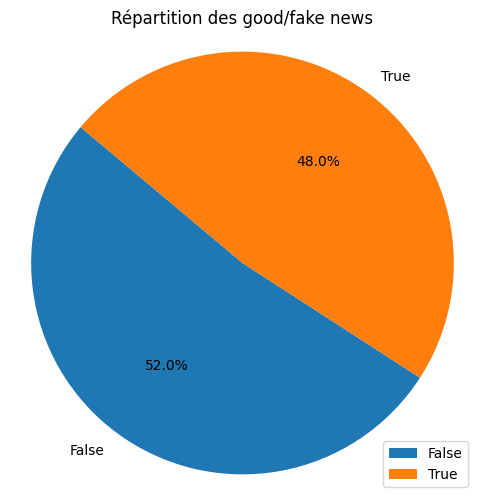

In [20]:
repartition_good_fake = df.Label.value_counts(normalize=True)
plt.figure(figsize=(6, 6))
plt.pie(repartition_good_fake, labels=repartition_good_fake.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Répartition des good/fake news')
plt.legend(loc="lower right")
plt.show()

*0 = fake news ; 1 = good news*

*Remarque : On peut voir qu'il y a plus de fake news que de good news dans notre dataset, malgrès que ce soit quand même assez bien proportonné entre les 2.*

## 4. Création et entrainement des modèles

### 4.1. On sépare notre dataset en données d'entrainements et de tests

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(df['text'], df['Label'], test_size=0.2, random_state=42)

**On vérifie le nombre de lignes dans nos variables**

In [22]:
X_train.shape

(43838,)

In [23]:
Y_train.shape

(43838,)

In [24]:
X_test.shape

(10960,)

In [25]:
Y_test.shape

(10960,)

### 4.2. On vectorise notre texte

In [26]:
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

### 4.3. On crée notre modèle avec RandomForestClassifier

#### 4.3.1. RandomForestClassifier

In [29]:
model_rfc = RandomForestClassifier(random_state=42)

model_rfc.fit(X_train_vec, Y_train)

Y_pred_rfc = model_rfc.predict(X_test_vec)

accuracy_rfc = accuracy_score(Y_test, Y_pred_rfc)
print(f"Accuracy de Random Forest: {accuracy_rfc}")

Accuracy de Random Forest: 0.9891423357664234


#### 4.3.2. DecisionTreeClassifier

In [28]:
model_dtc = DecisionTreeClassifier(random_state=42)

model_dtc.fit(X_train_vec, Y_train)

Y_pred_dtc = model_dtc.predict(X_test_vec)

accuracy_dtc = accuracy_score(Y_test, Y_pred_dtc)
print(f"Accuracy de Decision Tree: {accuracy_dtc}")

Accuracy de Decision Tree: 0.9956204379562044


#### 4.3.3. PassiveAggressiveClassifier

In [30]:
model_pac = PassiveAggressiveClassifier(random_state=42)

model_pac.fit(X_train_vec, Y_train)

Y_pred_pac = model_pac.predict(X_test_vec)

accuracy_pac = accuracy_score(Y_test, Y_pred_pac)
print(f"Accuracy de Passive Aggressive: {accuracy_pac}")

Accuracy de Passive Aggressive: 0.9971715328467153


## 5. Optimisation de nos différents modèles

### 5.1. Optimisation de RandomForestClassifier

In [32]:
param_grid_rfc = {"n_estimators": [i for i in range(5, 35, 5)],
                  "max_depth": [i for i in range(10, 60, 10)]}

grid_search_rfc = GridSearchCV(model_rfc, param_grid=param_grid_rfc, scoring='accuracy')

grid_search_rfc.fit(X_train_vec, Y_train)

best_params_rfc = grid_search_rfc.best_params_
best_score_rfc = grid_search_rfc.best_score_

print(f"Meilleurs paramètres : {best_params_rfc}")
print(f"Meilleur score : {best_score_rfc}")

Meilleurs paramètres : {'max_depth': 50, 'n_estimators': 30}
Meilleur score : 0.9838725585494377


### 5.2. Optimisation de DecisionTreeClassifier

In [33]:
param_grid_dtc = {"criterion": ['gini', 'entropy', 'log_loss'],
                  "max_depth": [i for i in range(10, 60, 10)],
                  "splitter": ['best', 'random']}

grid_search_dtc = GridSearchCV(model_dtc, param_grid=param_grid_dtc, scoring='accuracy')

grid_search_dtc.fit(X_train_vec, Y_train)

best_params_dtc = grid_search_dtc.best_params_
best_score_dtc = grid_search_dtc.best_score_

print(f"Meilleurs paramètres : {best_params_dtc}")
print(f"Meilleur score : {best_score_dtc}")

Meilleurs paramètres : {'criterion': 'gini', 'max_depth': 30, 'splitter': 'best'}
Meilleur score : 0.9966467807279955


### 5.3. Optimisation de PassiveAggressiveClassifier

In [34]:
param_grid_pac = {"C": [0.01, 0.05, 0.1, 0.5, 1]}

grid_search_pac = GridSearchCV(model_pac, param_grid=param_grid_pac, scoring='accuracy')

grid_search_pac.fit(X_train_vec, Y_train)

best_params_pac = grid_search_pac.best_params_
best_score_pac = grid_search_pac.best_score_

print(f"Meilleurs paramètres : {best_params_pac}")
print(f"Meilleur score : {best_score_pac}")

Meilleurs paramètres : {'C': 0.5}
Meilleur score : 0.9956886760779267


## 6. Évaluation de nos modèles

### 6.1. RandomForestClssifier

#### 6.1.1. Création du model

In [35]:
best_model_rfc = RandomForestClassifier(random_state=42, n_estimators=30, max_depth=50)

best_model_rfc.fit(X_train_vec, Y_train)

y_pred_rfc = best_model_rfc.predict(X_test_vec)

#### 6.1.2. Scores

##### 6.1.2.1. Accuracy score

In [36]:
print(f"L'accuracy du model est de : {accuracy_score(Y_test, y_pred_rfc)}")

L'accuracy du model est de : 0.9832116788321168


##### 6.1.2.2. Precision score

In [37]:
print(f"La meilleure précision du modèle est de : {precision_score(Y_test, y_pred_rfc)}")

La meilleure précision du modèle est de : 0.9820245979186376


## 5. Test de notre modèle

In [61]:
text_example = [
    ['Republican U.S. Representative Todd Rokita keeps a clock hanging on the wall of his Capitol Hill office that tracks the U.S. government’s rising debt in real time and reminds him of his top priority'],
    ['Trump is a reptil'],
    ['Racist Cops brutalize black boy for fun'],
    ['Democrat Jones winner of Senate election'],
    ['Trump on Tinder with Barak Obama'],
    ['First Lady Michelle Obama addressed the sexual assault bombshells that have been raining down upon the Republican nominee for nearly a week now.']
]

for text in text_example:
    text_vec = vectorizer.transform(text)
    print(model.predict(text_vec))

[1]
[0]
[0]
[1]
[0]
[1]


*Taux de réussite : 83%*

*Remarque : Le modèle reste perfectible.*